In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocks-price-appl/AAPL.csv


In [ ]:
# pip install pandas-datareader

In [ ]:
# pip install --upgrade pandas-datareader


In [8]:
### Data Collection
# import os
# import pandas_datareader as pdr
# KEY="abf00dbede638695cf71f47b1e80d8074c4d11d4"

In [12]:
# df = pdr.get_data_tiingo('AAPL',api_key=KEY)


# Replace 'your_api_key' with your actual API key

TypeError: concat() takes 1 positional argument but 2 were given

In [4]:
# df.to_csv('AAPL.csv')

NameError: name 'df' is not defined

In [3]:
df=pd.read_csv('/kaggle/input/stocks-price-appl/AAPL.csv')
print(df.head())
df.tail()

   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
df1=df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

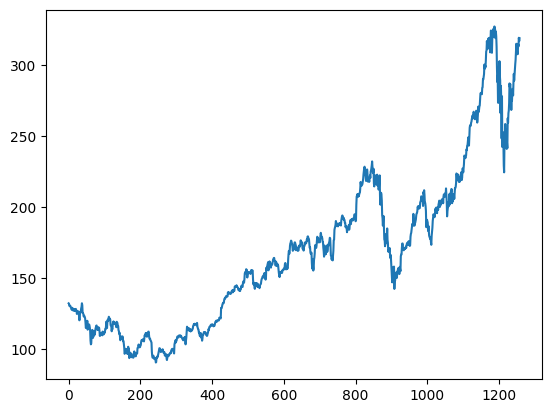

In [5]:
#representing the data in the form of graph using matplotlib
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
#As the LSTM model is very sensitive towards the input data we have to convert it into a particular range,we use MinMax function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Converts the DataFrame df1 into a NumPy array.
# Reshapes the array to ensure it has a single column for the feature you want to scale.
# Fits the scaler to the data (if it hasn't been done already) and then transforms (scales) the data using the learned scaling parameters.





print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [7]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
print(training_size,test_size)
print(train_data)

817 441
[[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]
 [0.16271215]
 [0.1614878 ]
 [0.1554927 ]
 [0.15443722]
 [0.15730811]
 [0.15604154]
 [0.15849025]
 [0.15308621]
 [0.15735033]
 [0.15490163]
 [0.15946129]
 [0.15688592]
 [0.1537195 ]
 [0.14434687]
 [0.14812547]
 [0.15308621]
 [0.15241071]
 [0.15055307]
 [0.14924428]
 [0.13607194]
 [0.12551718]
 [0.13906949]
 [0.14911762]
 [0.14890653]
 [0.15401503]
 [0.16115005]
 [0.16583636]
 [0.17618002]
 [0.17060711]
 [0.14725998]
 [0.14700667]
 [0.14422021]
 [0.13691632]
 [0.13949168]
 [0.13784514]
 [0.13522756]
 [0.13071012]
 [0.11863548]
 [0.10259225]
 [0.1058009 ]
 [0.10466098]
 [0.10630752]
 [0.12403952]
 [0.09773706]
 [0.10512539]
 [0.10474542]
 [0.10816516]
 [0.11323144]
 [0.11044499]
 [0.10415435]
 [0.09419066]
 [0.06510175]
 [0.05395592]
 [0.0565735 ]
 [0.08169383]
 [0.09533058]
 [0.09689268]
 [0.09465507]
 [0.07337668]
 [0.09288187]
 [0.08456472

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

#This way, the function creates multiple samples, each containing a sequence of past values (of length time_step) and 
# the corresponding target value (future value one step ahead). These samples can then be used to train models that

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-06-02 17:29:01.220365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 17:29:01.220460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 17:29:01.315481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model=Sequential() #created a empty model structure
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  #added the first layer of 50 hidden units giving there output to the next layer for further analysis
# input_shape=(100, 1): This defines the shape of the input data that the model expects. In this case, it expects an array of shape (samples, timesteps, features).
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) #creating the final layer which gives the pridicted single value
model.compile(loss='mean_squared_error',optimizer='adam')  #this statement compiles the model use root mean square technique to analyse the error in pridicted model and use adam algo to train the neural network

#this code snippet creates a stacked LSTM model with three LSTM layers, suitable for learning complex temporal patterns
#in time series data. The final dense layer with one neuron makes single-value predictions.
#created a 4 layered neural structure

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0359 - val_loss: 0.0511
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.8378e-04 - val_loss: 0.0075
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.3852e-04 - val_loss: 0.0035
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8452e-04 - val_loss: 0.0035
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8830e-04 - val_loss: 0.0034
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9353e-04 - val_loss: 0.0035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4008e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.6049e-04 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2941e-04 - val_loss: 0.0038
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.6977e-04 - val_loss: 0.0032
Epoch 12/100
12/

In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [24]:
##Transformback to original form to calcute the RMS values
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

33706.6826433703

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

56421.00205252723

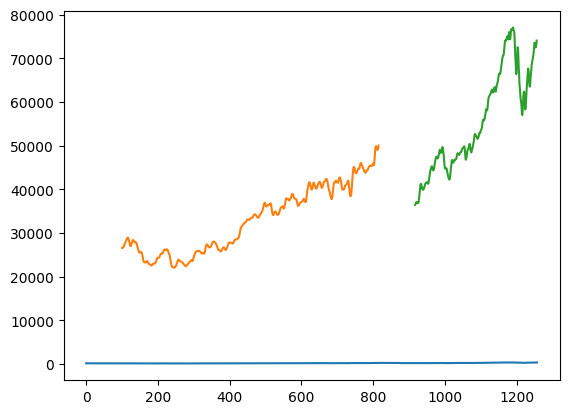

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

441

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.8583551465000423, 0.8866418981676942, 0.8743139407244789, 0.8843198513890065, 0.8783669678290975, 0.8986321033521913, 0.925821160179009, 0.9287764924427933, 0.9567677108840666, 0.9386979650426415, 0.933040614709111, 0.9495060373216249, 0.9642404796082076, 0.9551211686228154, 0.9598919192772104, 0.9663514312251966, 0.9624672802499368, 0.9229502659799038, 0.9598497002448705, 0.9879253567508233, 0.985941062230854, 0.9253145317909315, 0.9217259140420504, 0.964747107996285, 0.9757240564046274, 0.9915984125643842, 0.9697289538123788, 0.9761462467280253, 0.9679557544541082, 1.0000000000000002, 0.9901629654648318, 0.9905007177235499, 0.9653803934813816, 0.9848855864223593, 0.9708688676855528, 0.9402600692392133, 0.8774803681499621, 0.8348391454867856, 0.8541332432660644, 0.7733682344000676, 0.7726927298826314, 0.8801401671873683, 0.8400743054969182, 0.8967322468969012, 0.8552731571392387, 0.8388499535590646, 0.7423372456303303, 0.8232711306256861, 0.7814320695769654, 0.6665963016127672, 0.7

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)